In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [5]:
dataFrame= pd.read_csv("alzheimer.csv")

In [6]:
dataFrame.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [7]:
dataFrame.describe()

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [8]:
dataFrame.isnull().sum()

Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

In [9]:
dataFrame

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,Demented,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,Demented,M,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,Nondemented,F,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,Nondemented,F,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [10]:
dataFrame["SES"].isnull().sum() / dataFrame.shape[0]*100

5.093833780160858

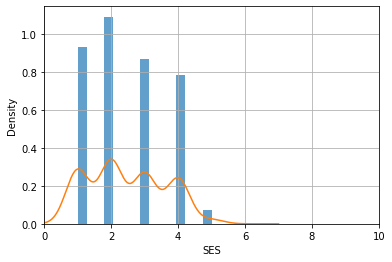

In [11]:
ax = dataFrame["SES"].hist(bins=15, density=True, stacked=True, alpha=0.7)
dataFrame["SES"].plot(kind="density")
ax.set(xlabel= "SES")
plt.xlim(0,10)
plt.grid()
plt.show() # Kısmen homojenik dağılım gösterdiği için null değerlerinin yerine ortalama değer kullanmayı tercih ettik.

In [12]:
dataFrame["MMSE"].isnull().sum() / dataFrame.shape[0]*100 # yüzde 0.5 lik null değeri var

0.5361930294906166

In [13]:
imputer = SimpleImputer(missing_values = np.nan,strategy='mean')

In [14]:
meanValue= dataFrame.iloc[:,4:6].values

In [15]:
meanValue

array([[ 2., 27.],
       [ 2., 30.],
       [nan, 23.],
       [nan, 28.],
       [nan, 22.],
       [ 3., 28.],
       [ 3., 27.],
       [ 4., 28.],
       [ 4., 29.],
       [ 4., 30.],
       [nan, 28.],
       [nan, 27.],
       [nan, 27.],
       [ 2., 30.],
       [ 2., 29.],
       [ 2., 27.],
       [ 2., 24.],
       [ 3., 30.],
       [ 3., 29.],
       [ 2., 29.],
       [ 2., 29.],
       [ 2., 29.],
       [ 4., 30.],
       [ 4., 30.],
       [ 4., 29.],
       [ 3., 21.],
       [ 3., 16.],
       [ 4., 25.],
       [ 4., 23.],
       [ 3., 29.],
       [ 3., 27.],
       [ 3., 30.],
       [ 3., 27.],
       [ 1., 30.],
       [ 1., 29.],
       [ 1., 27.],
       [ 1., 29.],
       [ 1., 28.],
       [ 1., 26.],
       [ 1., 26.],
       [ 1., 25.],
       [ 3., 30.],
       [ 3., 29.],
       [ 4., 21.],
       [ 4., 21.],
       [ 3., 27.],
       [ 3., 27.],
       [ 3., 29.],
       [ 3., 30.],
       [ 3., 30.],
       [ 3., 30.],
       [ 2., 22.],
       [ 2.,

In [16]:
imputer = imputer.fit(meanValue)

In [17]:
meanValue

array([[ 2., 27.],
       [ 2., 30.],
       [nan, 23.],
       [nan, 28.],
       [nan, 22.],
       [ 3., 28.],
       [ 3., 27.],
       [ 4., 28.],
       [ 4., 29.],
       [ 4., 30.],
       [nan, 28.],
       [nan, 27.],
       [nan, 27.],
       [ 2., 30.],
       [ 2., 29.],
       [ 2., 27.],
       [ 2., 24.],
       [ 3., 30.],
       [ 3., 29.],
       [ 2., 29.],
       [ 2., 29.],
       [ 2., 29.],
       [ 4., 30.],
       [ 4., 30.],
       [ 4., 29.],
       [ 3., 21.],
       [ 3., 16.],
       [ 4., 25.],
       [ 4., 23.],
       [ 3., 29.],
       [ 3., 27.],
       [ 3., 30.],
       [ 3., 27.],
       [ 1., 30.],
       [ 1., 29.],
       [ 1., 27.],
       [ 1., 29.],
       [ 1., 28.],
       [ 1., 26.],
       [ 1., 26.],
       [ 1., 25.],
       [ 3., 30.],
       [ 3., 29.],
       [ 4., 21.],
       [ 4., 21.],
       [ 3., 27.],
       [ 3., 27.],
       [ 3., 29.],
       [ 3., 30.],
       [ 3., 30.],
       [ 3., 30.],
       [ 2., 22.],
       [ 2.,

In [18]:
meanValue= imputer.transform(meanValue)

In [19]:
meanValue

array([[ 2.        , 27.        ],
       [ 2.        , 30.        ],
       [ 2.46045198, 23.        ],
       [ 2.46045198, 28.        ],
       [ 2.46045198, 22.        ],
       [ 3.        , 28.        ],
       [ 3.        , 27.        ],
       [ 4.        , 28.        ],
       [ 4.        , 29.        ],
       [ 4.        , 30.        ],
       [ 2.46045198, 28.        ],
       [ 2.46045198, 27.        ],
       [ 2.46045198, 27.        ],
       [ 2.        , 30.        ],
       [ 2.        , 29.        ],
       [ 2.        , 27.        ],
       [ 2.        , 24.        ],
       [ 3.        , 30.        ],
       [ 3.        , 29.        ],
       [ 2.        , 29.        ],
       [ 2.        , 29.        ],
       [ 2.        , 29.        ],
       [ 4.        , 30.        ],
       [ 4.        , 30.        ],
       [ 4.        , 29.        ],
       [ 3.        , 21.        ],
       [ 3.        , 16.        ],
       [ 4.        , 25.        ],
       [ 4.        ,

In [20]:
dataFrame["SES"] = meanValue[:,0]

In [21]:
dataFrame["MMSE"] = meanValue[:,1]

In [22]:
dataFrame

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,2.460452,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,Demented,M,82,16,1.000000,28.0,0.5,1693,0.694,1.037
369,Demented,M,86,16,1.000000,26.0,0.5,1688,0.675,1.040
370,Nondemented,F,61,13,2.000000,30.0,0.0,1319,0.801,1.331
371,Nondemented,F,63,13,2.000000,30.0,0.0,1327,0.796,1.323


In [23]:
teshis= dataFrame.iloc[:,0:1].values

In [24]:
teshis

array([['Nondemented'],
       ['Nondemented'],
       ['Demented'],
       ['Demented'],
       ['Demented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Demented'],
       ['Demented'],
       ['Demented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Demented'],
       ['Demented'],
       ['Demented'],
       ['Demented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Demented'],
       ['Demented'],
       ['Demented'],
       ['Demented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Converted'],
       ['Converted'],
       ['Converted'],
       ['Converted'],
       ['Converted'],
       ['Converted'],
       ['Demented'],
       ['Demented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Demented'],
       

In [25]:
le= preprocessing.LabelEncoder()

In [26]:
teshis=le.fit_transform(teshis)

C:\Users\dilar\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
teshis

array([2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1,
       1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 0, 0, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0,
       0, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1,

In [28]:
dataFrame["Group"]=teshis

In [29]:
dataFrame

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,2,M,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,2,M,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,1,M,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,1,M,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,1,M,80,12,2.460452,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,1,M,82,16,1.000000,28.0,0.5,1693,0.694,1.037
369,1,M,86,16,1.000000,26.0,0.5,1688,0.675,1.040
370,2,F,61,13,2.000000,30.0,0.0,1319,0.801,1.331
371,2,F,63,13,2.000000,30.0,0.0,1327,0.796,1.323


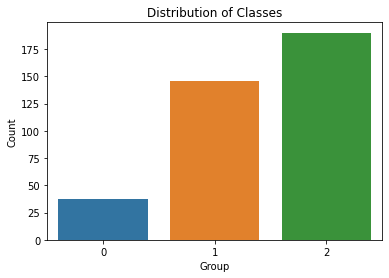

In [30]:
sbn.countplot(data=dataFrame, x='Group')
plt.title("Distribution of Classes")
plt.xlabel("Group")
plt.ylabel("Count")
plt.show()

In [31]:
dataFrame.rename(columns={'M/F':'mf'},inplace=True)

In [32]:
nondemented=dataFrame[dataFrame.Group==2]

In [33]:
converted=dataFrame[dataFrame.Group==0]

In [34]:
demented=dataFrame[dataFrame.Group==1] 

In [35]:
cinsiyet= dataFrame.iloc[:,1:2].values

In [36]:
le= preprocessing.LabelEncoder()

In [37]:
cinsiyet= le.fit_transform(cinsiyet)

C:\Users\dilar\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
male=dataFrame[dataFrame.mf==1]
female=dataFrame[dataFrame.mf==0]

In [39]:
dataFrame.rename(columns={'mf':'M/F'},inplace=True)

In [40]:
dataFrame["M/F"]=cinsiyet

In [41]:
dataFrame

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,2,1,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,2,1,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,1,1,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,1,1,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,1,1,80,12,2.460452,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,1,1,82,16,1.000000,28.0,0.5,1693,0.694,1.037
369,1,1,86,16,1.000000,26.0,0.5,1688,0.675,1.040
370,2,0,61,13,2.000000,30.0,0.0,1319,0.801,1.331
371,2,0,63,13,2.000000,30.0,0.0,1327,0.796,1.323


In [42]:
dataFrame.corr()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Group,1.000000,-0.143918,-0.049267,0.100606,0.053290,0.339906,-0.572518,0.056693,0.258093,-0.042848
M/F,-0.143918,1.000000,-0.037726,0.089279,-0.044525,-0.166521,0.202140,0.572549,-0.249618,-0.561647
Age,-0.049267,-0.037726,1.000000,-0.027886,-0.046665,0.055607,-0.026257,0.042348,-0.518359,-0.035067
EDUC,0.100606,0.089279,-0.027886,1.000000,-0.708680,0.194454,-0.153121,0.257015,-0.012200,-0.241752
SES,0.053290,-0.044525,-0.046665,-0.708680,1.000000,-0.146913,0.073393,-0.254271,0.089436,0.246673
MMSE,0.339906,-0.166521,0.055607,0.194454,-0.146913,1.000000,-0.679837,-0.031789,0.341857,0.039494
CDR,-0.572518,0.202140,-0.026257,-0.153121,0.073393,-0.679837,1.000000,0.022819,-0.344819,-0.029340
eTIV,0.056693,0.572549,0.042348,0.257015,-0.254271,-0.031789,0.022819,1.000000,-0.210122,-0.988877
nWBV,0.258093,-0.249618,-0.518359,-0.012200,0.089436,0.341857,-0.344819,-0.210122,1.000000,0.213476
ASF,-0.042848,-0.561647,-0.035067,-0.241752,0.246673,0.039494,-0.029340,-0.988877,0.213476,1.000000


In [43]:
dataFrame

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,2,1,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,2,1,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,1,1,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,1,1,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,1,1,80,12,2.460452,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,1,1,82,16,1.000000,28.0,0.5,1693,0.694,1.037
369,1,1,86,16,1.000000,26.0,0.5,1688,0.675,1.040
370,2,0,61,13,2.000000,30.0,0.0,1319,0.801,1.331
371,2,0,63,13,2.000000,30.0,0.0,1327,0.796,1.323


In [44]:
x=dataFrame.iloc[:,1:10].values #bağımlı değişken

In [45]:
y=dataFrame.iloc[:,0].values #bağımsız değişkenler

In [46]:
x

array([[1.000e+00, 8.700e+01, 1.400e+01, ..., 1.987e+03, 6.960e-01,
        8.830e-01],
       [1.000e+00, 8.800e+01, 1.400e+01, ..., 2.004e+03, 6.810e-01,
        8.760e-01],
       [1.000e+00, 7.500e+01, 1.200e+01, ..., 1.678e+03, 7.360e-01,
        1.046e+00],
       ...,
       [0.000e+00, 6.100e+01, 1.300e+01, ..., 1.319e+03, 8.010e-01,
        1.331e+00],
       [0.000e+00, 6.300e+01, 1.300e+01, ..., 1.327e+03, 7.960e-01,
        1.323e+00],
       [0.000e+00, 6.500e+01, 1.300e+01, ..., 1.333e+03, 8.010e-01,
        1.317e+00]])

In [47]:
y

array([2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1,
       1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 0, 0, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0,
       0, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1,

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.44,random_state=1)

In [49]:
sc=StandardScaler()

In [50]:
X_train=sc.fit_transform(x_train)

In [51]:
X_test=sc.transform(x_test)

In [52]:
knn= KNeighborsClassifier(n_neighbors=7,metric='minkowski')

In [53]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [54]:
y_pred=knn.predict(X_test)

In [55]:
sayac=1
for k in range (1,11):
    knn_yeni= KNeighborsClassifier(n_neighbors=k)
    knn_yeni.fit(X_train,y_train)
    print(sayac,knn_yeni.score(X_test,y_test)*100)
    sayac+=1

1 86.06060606060606
2 78.78787878787878
3 89.0909090909091
4 88.48484848484848
5 90.30303030303031
6 91.51515151515152
7 92.12121212121212
8 90.9090909090909
9 90.30303030303031
10 89.6969696969697


In [56]:
knn.score(X_test,y_test)

0.9212121212121213

In [57]:
# Yeni bir hasta tahmini için:
from sklearn.preprocessing import MinMaxScaler

In [58]:
sc = MinMaxScaler()

In [59]:
sc.fit_transform(x)

array([[1.        , 0.71052632, 0.47058824, ..., 0.98106904, 0.26943005,
        0.00984529],
       [1.        , 0.73684211, 0.47058824, ..., 1.        , 0.19170984,
        0.        ],
       [1.        , 0.39473684, 0.35294118, ..., 0.63697105, 0.47668394,
        0.23909986],
       ...,
       [0.        , 0.02631579, 0.41176471, ..., 0.23719376, 0.8134715 ,
        0.63994374],
       [0.        , 0.07894737, 0.41176471, ..., 0.24610245, 0.78756477,
        0.62869198],
       [0.        , 0.13157895, 0.41176471, ..., 0.25278396, 0.8134715 ,
        0.62025316]])

In [60]:
# F=0  M=1 nondemented=2 demented=1 converted=0

In [61]:
new_prediction = knn.predict(sc.transform(np.array([[0,178,72,35,0,9.6,0.627,50,0.11]])))

In [62]:
new_prediction[0]

2

In [66]:
new_prediction = knn.predict(sc.transform(np.array([[1,87,14,2,27,0,1987,0.696,0.883]])))

In [64]:
new_prediction[0]

1

In [69]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score 

In [70]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk Oranı: {accuracy:.2f}")

Doğruluk Oranı: 0.92
